## Лабораторна 3: метод найближчих сусідів (kNN)

На даній лабораторні йроботі ми будемо створювати модель для передбачення пасажирів на "Титаніку", які вижили (це є класичним начальним прикладом змагання на платформі Kaggle [соревнование](https://www.kaggle.com/c/titanic)).

![Титанік](http://staff.mmcs.sfedu.ru/~sguda/MachineLearning/titanic.png)

## 1

Завантажте дані про загинувших у катастрофі з "Титаніком". Цільовою ознакою тут є факт рятування пасажирів. Погляньте на дані

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')
nc_data = pd.read_csv('data.csv')

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Для спрощення виключіт пасажирів з невідомим віком та наново пронумеруйте рядки

*Функції, що можуть бйти корисні при розв'язанні: `.dropna(subset=['Age']), .reset_index(drop=True)`*

In [3]:
data = data.dropna(subset=['Age'])

## 2

побудуйте графік розсіювання з віком в якості вісі абсцисс та вартістю білету, в якості вісі ординат. Червоним відмітьте загинувших, зеленим - тих пасажирів, які врятувались. Окремо побудуйте два графіки: для жінок та для чоловіків. 

Зробіть а занотуйте висновок: чи виконується для даної множини гіпотеза компактності?

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Female Scatter Plot')

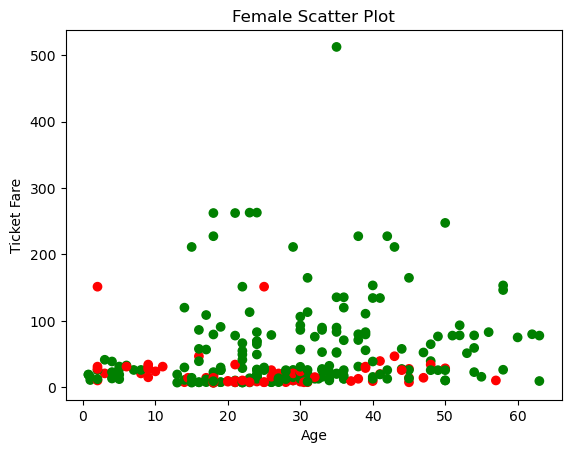

In [26]:
female = data[data['Sex'] == 'female']

colors = {1: 'green', 0: 'red'}
color_mapping = [colors[s] for s in female['Survived']]


plt.scatter(female['Age'], female['Fare'], c=color_mapping, label='Female Passengers')
plt.xlabel('Age')
plt.ylabel('Ticket Fare')
plt.title('Female Scatter Plot')

Text(0.5, 1.0, 'Male Scatter Plot')

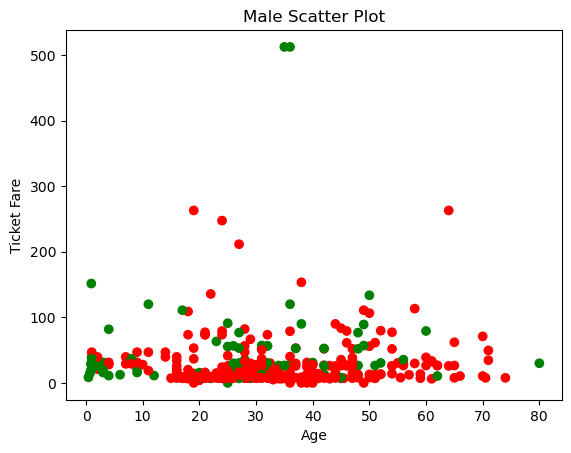

In [27]:
male = data[data['Sex'] == 'male']

colors = {1: 'green', 0: 'red'}
color_mapping = [colors[s] for s in male['Survived']]


plt.scatter(male['Age'], male['Fare'], c=color_mapping, label='Male Passengers')
plt.xlabel('Age')
plt.ylabel('Ticket Fare')
plt.title('Male Scatter Plot')

## 3 

Для побудови моделі нам потрібна метрика близькості пасажирів. Запрограмуємо функцію обчислення відстані між пасажирами:

In [24]:
def distance(a,b):
    d = 0
    d += abs(a['Pclass'] - b['Pclass'])
    d += a['Sex'] != b['Sex']
    d += abs(a['Age'] - b['Age'])
    d += abs(a['SibSp'] - b['SibSp'])
    d += abs(a['Parch'] - b['Parch'])
    d += abs(a['Fare'] - b['Fare'])
    d += a['Embarked'] != b['Embarked']
    return d/5

Метод `KNeighborsClassifier` з біблиотеки `sklearn` занадто вимоглив до типів даних. Запрограмуємо метод `k` найближчих сусідів вручну:

In [23]:
import numpy as np
import tqdm
np.zeros((data.shape[0] - 1, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [22]:
def myKNeighborsClassifier(learnData, K, passengerIndexForPrediction):
    dists = np.zeros((learnData.shape[0] - 1, 2))
    i = 0
    for idx, row in learnData.iterrows():
        if idx != passengerIndexForPrediction:  #LOO метод контролю похибки
            dists[i][0] = distance(learnData.loc[passengerIndexForPrediction,], row)
            dists[i][1] = row['Survived']
            i += 1
    dists = sorted(dists, key = lambda pair: pair[0])
    prediction = 0
    for i in range(K): 
        prediction += dists[i][1]
        print(prediction)
    prediction /= K
    return round(prediction)

Запустіть передбачення для всіх пасажирів судна та, використовуючи LOO-контроль помилки оцініть якість класифікації:

In [26]:
accuracy = 0
for idx, row in tqdm.tqdm(data.iterrows(), total=len(data)):
    accuracy += row['Survived'] == myKNeighborsClassifier(data, 3, idx)
acc = accuracy/data.shape[0]
print(f'Точність моделі без тестової вибірка: {acc:.3f}')

100%|████████████████████████████████████████████████████████████████████████████████| 714/714 [02:21<00:00,  5.03it/s]

Точність моделі без тестової вибірка: 0.735


 **Same Task my Sklearn** 

In [5]:
##Same Task by Sklearn (На доп бали і для перевірки)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Перетворення категоріальних ознак в числові
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'].astype(str))

# Вибірка стовпців, які будуть використанні для передбачення
data = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]

# Розділ даних на ознаки і цільову змінну
X = data.drop('Survived', axis=1)
y = data['Survived']

# Розділ даних на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)

# Побудова моделы KNN та навчання її на тренувальних даних
knn = KNeighborsClassifier(n_neighbors=5)  # Ви можете змінити кількість сусідів за необхідності
knn.fit(X_train, y_train)

# Оцінка результату на тестових даних
accuracy = knn.score(X_test, y_test)
print(f'Точність моделі на тестовій вибірці: {accuracy:.3f}')

Точність моделі на тестовій вибірці: 0.676


Підберіть доданки в метриці, ії ваги та кількість сусідів так, щоб кількість класифікацій була максимальна. 

Якщо функція на `python` працює довго, використовуйте її аналог на  на 
С++:  `KNeighborsClassifier.cpp.` 

Компіляція на Linux виконується командою 

    g++ -O2 KNeighborsClassifier.cpp -o  KNeighborsClassifier


Запуск: 

    ./KNeighborsClassifier
    
Тому, хто побудує метрику з найкращею якістю: +5 бонусних балів. Також тають бути висновки та обгрунтування результату.

## 4 


Створіть копію функції `myKNeighborsClassifier` та змініть її так, щоб вона рахувала виступ об'єкту. Дайте їй назву `calcMargin`. 

Підрахуйте виступи для всіх об'єктів та виведіть інформацію про п'ять об'єктів з мінімальним виступом (вбросу завад) та п'яти об'єктів з максимальним виступом (еталонах). В коментарях розпишіть пояснення отриманих даних.

In [7]:
def calcMargin(learnData, K, passengerIndexForPrediction):
    dists = np.zeros((learnData.shape[0] - 1, 2))
    i = 0
    for idx, row in learnData.iterrows():
        if idx != passengerIndexForPrediction:
            dists[i][0] = distance(learnData.loc[passengerIndexForPrediction,], row)
            dists[i][1] = row['Survived']
            i += 1
    dists = sorted(dists, key=lambda pair: pair[0])

    # Розрахунок виступу (margin) для об'єкту
    margin = 0
    for i in range(K):
        margin += dists[i][1]

    return margin

In [17]:
#Підрахунок виступу для всіх об'єктів
margins = []
for idx, row in tqdm.tqdm(data.iterrows(), total=len(data)):
    margin = calcMargin(data, 5, idx)
    margins.append((idx, margin))

#Сортування об'єктів за виступом
sorted_margins = sorted(margins, key=lambda x: x[1])

#Виведення п'яти об'єктів з мінімальним і п'ять об'єктів з максимальним виступом
top_min_margins = sorted_margins[:5]
top_max_margins = sorted_margins[-5:]

print("П'ять об'єктів з мінімальним виступом:")
for obj in top_min_margins:
    print(nc_data.iloc[obj[0]])

print("\nП'ять об'єктів з максимальним виступом:")
for obj in top_max_margins:
    print(nc_data.iloc[obj[0]])

100%|████████████████████████████████████████████████████████████████████████████████| 714/714 [01:41<00:00,  7.01it/s]

П'ять об'єктів з мінімальним виступом:
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object
PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                35.0
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                      

In [ ]:
# місце для коду

Це легше за все виконати за допомогою фунції `np.argsort`, що повертає індекси елементів у відсортованому ряду:

In [23]:
idx = np.argsort(margins)
top_min_margins = sorted_margins[:5]
top_max_margins = sorted_margins[-5:]

In [26]:
print('Білі ворони(аномалії)')
for obj in top_min_margins:
    print(nc_data.iloc[obj[0]])

Білі ворони(аномалії)
PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object
PassengerId                           5
Survived                              0
Pclass                                3
Name           Allen, Mr. William Henry
Sex                                male
Age                                35.0
SibSp                                 0
Parch                                 0
Ticket                           373450
Fare                               8.05
Cabin                               NaN
Embarked                              S
Name: 4

In [24]:
print('Еталони (характерні об`єкти)')
for obj in top_max_margins:
    print(nc_data.iloc[obj[0]])

Еталони (характерні об`єкти)
PassengerId                                                  760
Survived                                                       1
Pclass                                                         1
Name           Rothes, the Countess. of (Lucy Noel Martha Dye...
Sex                                                       female
Age                                                         33.0
SibSp                                                          0
Parch                                                          0
Ticket                                                    110152
Fare                                                        86.5
Cabin                                                        B77
Embarked                                                       S
Name: 759, dtype: object
PassengerId                                          764
Survived                                               1
Pclass                                              

### 5
Загальні висвовки по лабраторній роботі:

1. Було розподілено об'єкти по певному параметру
2. Було розподілено об'єкти по кількох параметрах, повторено побудову графіків розподілу по кільком параметрам
3. Було здобуто навички щодо користування K-методом найближчих сусідів
4. Поглиблено навички користування K-методом найближчих сусідів, а також опрацювання моделі

Виконав студент групи ІСТ-21-1, Дешков Максім
